In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better plots in Jupyter Notebooks
%matplotlib inline  

# Load the dataset
df = pd.read_csv("Bengaluru_House_Data.csv")

# Quick look at the data
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### What Are We Looking For?
- Rows & Columns: How big is the dataset?
- Data Types: Are numbers stored as text?
- Missing Values: Are there any NaNs?
- Outliers: Does anything look suspicious—like a house with 50 bathrooms?

In [4]:
# Shape of the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 13320, Columns: 9


In [5]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# Summary statistics
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### Data Cleaning

In [7]:
# Check for missing values
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

##### Critical columns (like price, location, size) → Drop rows if missing.
##### Less critical (like bath) → Fill with median.

In [8]:
# Dropping rows with crucial missing values
df.dropna(subset=['location', 'size', 'total_sqft', 'price'], inplace=True)

In [9]:
# Filling missing bathroom data with the median
df['bath'].fillna(df['bath'].median(), inplace=True)

##### Handling Duplicates

In [10]:
# Check for duplicate rows
df.duplicated().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

## Feature Engineering

The size column looks like "3 BHK" or "4 Bedroom". We need that number.

In [11]:
# Extract number of bedrooms (BHK)
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if pd.notnull(x) else None)

Converting Total Sqft to Numeric

Some values are ranges like "2100 - 2850". We’ll take the average.

In [12]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


Univariate Analysis (Distributions)

*Let’s see how individual features are distributed.*

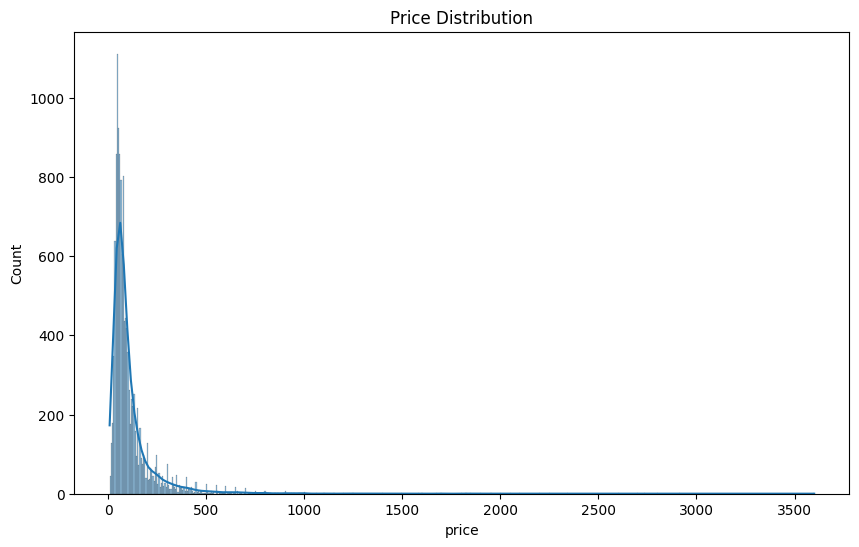

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

#histplot shows how prices are spread.
#kde=True adds a smooth curve to see the distribution.

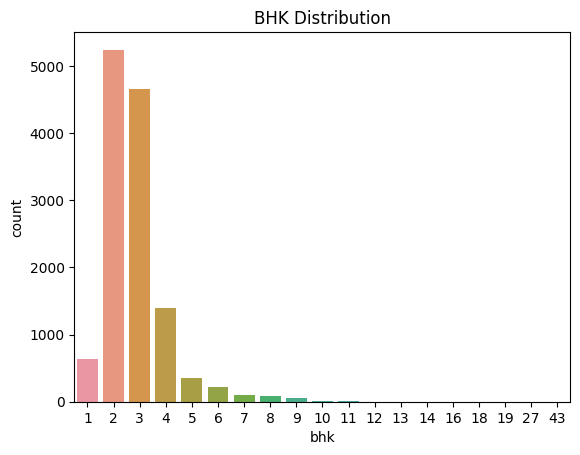

In [15]:
# Number of Bedrooms (BHK) Distribution
sns.countplot(x='bhk', data=df)
plt.title('BHK Distribution')
plt.show()

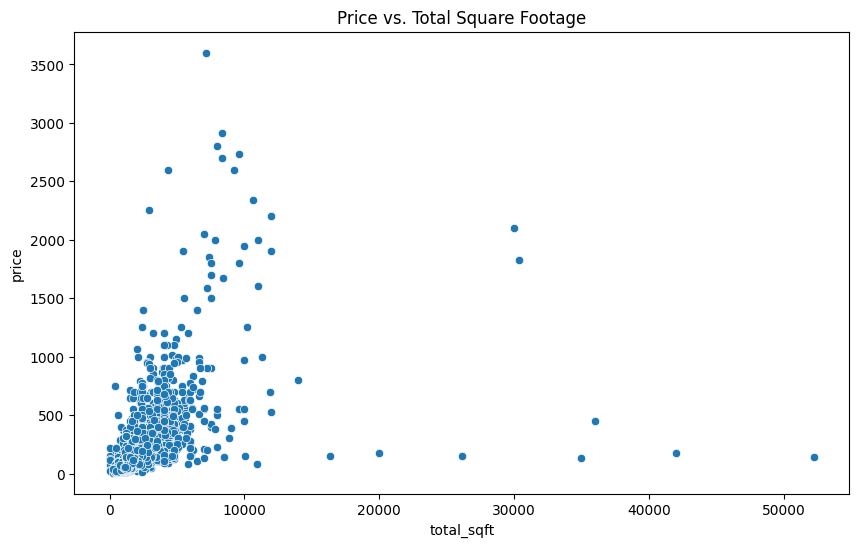

In [16]:
# Price vs. Total Square Foot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Price vs. Total Square Footage')
plt.show()

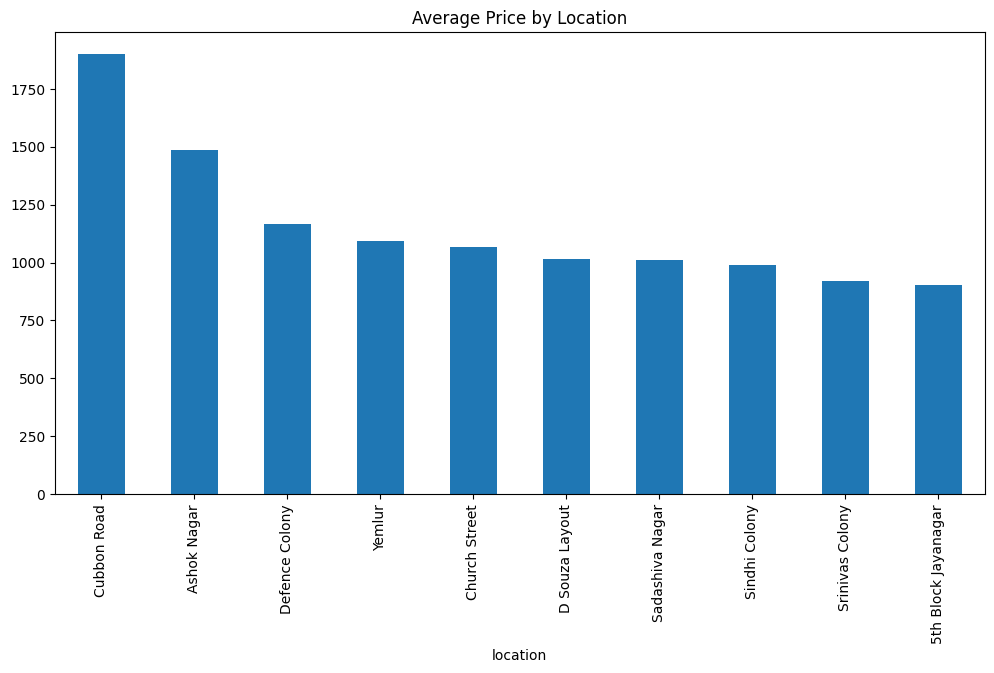

In [17]:
# Price per Location
top_locations = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)
top_locations.plot(kind='bar', figsize=(12, 6))
plt.title('Average Price by Location')
plt.show()

### Outlier Detection & Treatment\

Boxplots help identify outliers.
We’ll consider removing extreme cases that don’t make sense.

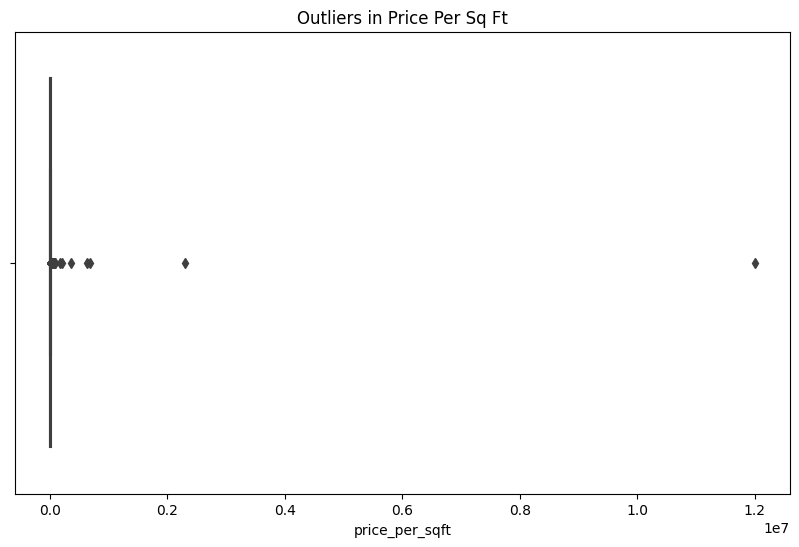

In [18]:
# Price Per Square Foot

df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_sqft'])
plt.title('Outliers in Price Per Sq Ft')
plt.show()

## Correlation Analysis

Correlation Matrix: Values close to 1 or -1 indicate strong relationships.

Helps us decide which features matter for prediction.


C:\Users\User\AppData\Local\Temp\ipykernel_17312\3921025560.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


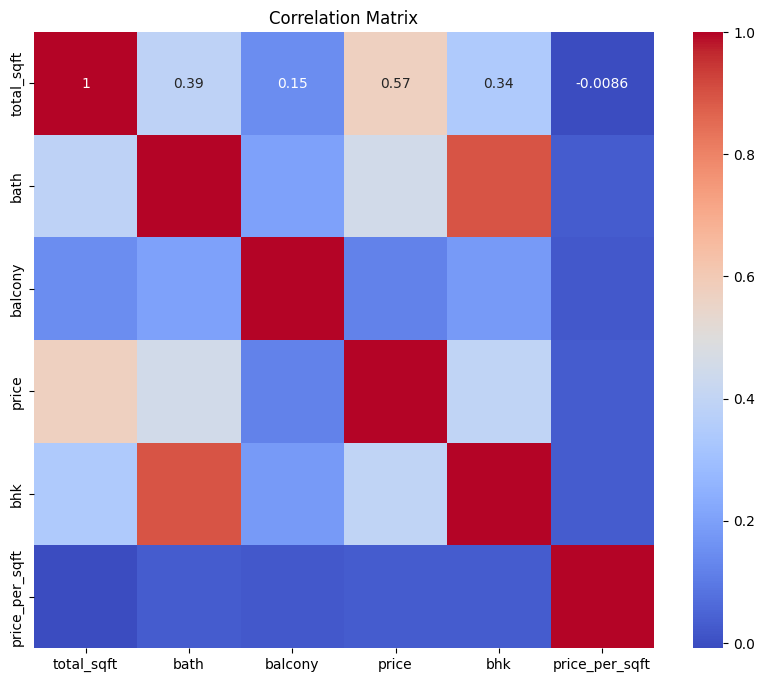

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

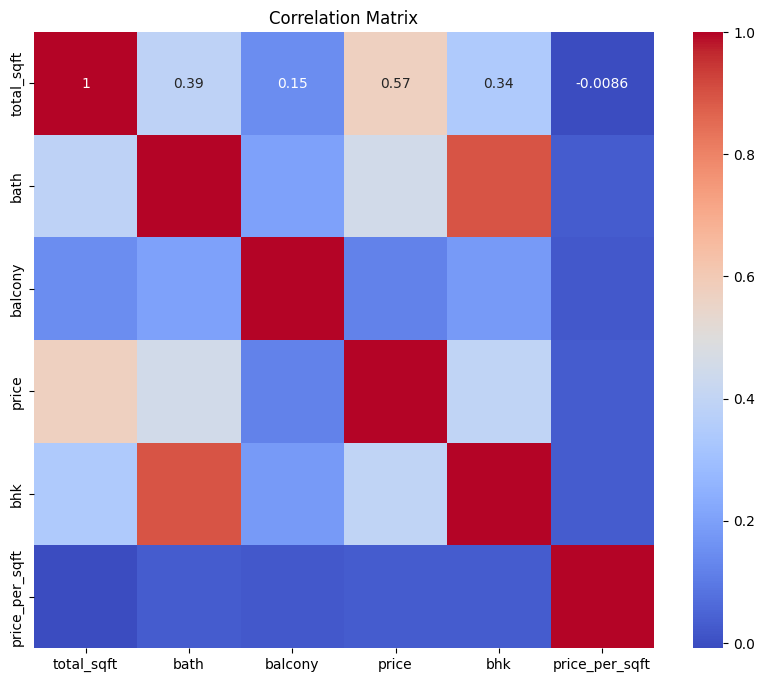

In [21]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()